<a href="https://colab.research.google.com/github/qursaan/ml-drill-notebooks/blob/main/1_LinearRegressionManual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**

## Programming Exercise 1
In this exercise, you will implement **linear regression** and get to see it work on data. 


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to simple linear function.

The general form of 1-D equation given by
\begin{equation*}
  \hat{y}=\theta_0 + \theta_1 x
\end{equation*}
Given the following data we need to guess the equation parameters $θ_0$ and $θ_1$.

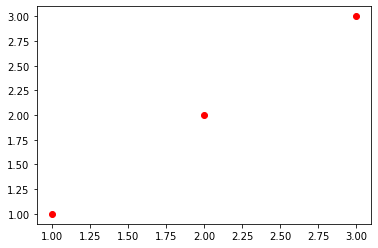

In [6]:
y = [1,2,3] # label
x = [1,2,3] # feature

plt.plot(x, y, 'o', color='red');

#### **Model Represenation**


Using the definition of matrix multiplication, our hypothesis function can be concisely represented as:

\begin{equation*}
  \hat{y}=\theta_0 x_0+ \theta_1 x_1\\
\end{equation*}
OR
\begin{equation*}
  \hat{Y}=X \Theta
\end{equation*}

where 

\begin{equation*}
X =  \begin{bmatrix}
x_0^{(1)} & x_1^{(1)} \\
x_0^{(2)} & x_1^{(2)} \\
x_0^{(3)} & x_1^{(3)} \\
\end{bmatrix}  \\
\Theta = \begin{bmatrix}
\theta_0 \\ \theta_1 \\
\end{bmatrix}  \\
\end{equation*}

**Note**: The training examples are stored in X row-wise, The following example shows us the reason behind setting $x_0^{(i)}=1$. $x_i$ is column vector $1\times m$.

Assume Start with $\theta_0=0$, and $\theta_1=0$

In [70]:
# Redefine Variable 
X = np.array([[1 , 1],[1,  2],[1 , 3]])
Y = np.array([[1],[2],[3]])
theta = np.array([[0],[0]])
m = 3

print("X = \n", X)
print("Y = \n", Y)
print("θ = \n", theta)

X = 
 [[1 1]
 [1 2]
 [1 3]]
Y = 
 [[1]
 [2]
 [3]]
θ = 
 [[0]
 [0]]


In [49]:
# Predict Y using theta0= 0 and theta_1=0
Y_hat = X.dot(theta)

print("y^ = " ,Y_hat)

y^ =  [[0]
 [0]
 [0]]


#### **Cost function**

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of all the results of the hypothesis with inputs from x's and the actual output y's.
\begin{equation*}
J(\theta_0,\theta_1)=\frac{1}{2m} \sum_{i=1}^m(h_θ (x_i) -y_i )^2 
\end{equation*}
Using vectorized form
\begin{equation*}
J(\theta_0,\theta_1)=\frac{1}{2m} (\hat{Y} - Y)^{T}(\hat{Y} - Y)
\end{equation*}



In [71]:
print(Y_hat - Y)

[[-1]
 [-2]
 [-3]]


In [56]:
# Calc Squre Error
SqrError = (Y_hat - Y).transpose().dot(Y_hat - Y)

print("SqrError = ", SqrError)

SqrError =  [[14]]


In [58]:
# Calc Cost Value

J = 1/(2*m) * SqrError

print("J = ", J)

J =  [[2.33333333]]


Group ***Cost operation*** in function

In [61]:
# Group All in one function
def computeCost(X,y, theta):
    m=len(y)
    y_hat = X.dot(theta)
    SqrError = (y_hat - y).transpose().dot(y_hat - y)
    J = 1/(2*m) * SqrError
    return J

In [62]:
# Try function 
print("J = ", computeCost(X,Y, theta))

J =  [[2.33333333]]


### Gradient Descent 
The gradient descent algorithm is:
repeat until convergence:
\begin{equation*}
\theta_j:=\theta_j-\alpha \frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1)
\end{equation*}

Where j=0,1 represents the feature index number, and $\alpha$ is the learning rate.

This lead to

\begin{equation*}
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m(h_{\theta} (x^{(i)}) -y^{(i)} ) x_j^{(i)}
\end{equation*}

Using vectorized form
\begin{equation*}
\theta_j:=\theta_j-\alpha \frac{1}{m} (\hat{Y} - Y)^{T}(X)
\end{equation*}



In [108]:
# set alpha
alpha = 0.1

In [109]:
new_theta = theta - alpha/m *((Y_hat-Y).transpose().dot(X)).transpose()

print("Old Theta = \n", theta)
print("New Theta = \n", new_theta)


Old Theta = 
 [[0]
 [0]]
New Theta = 
 [[0.2       ]
 [0.46666667]]


Group ***Gredient descent*** in function



In [110]:
def gredient_descent(X, y, theta, alpha, num_iters):
    m=len(y)
    J_history = []
    for i in range(num_iters):
      # Calc Cost
      J = computeCost(X,Y, theta)
      print("Iteration: ", i ," theta = [", round(theta[0][0],3),"," ,round(theta[1][0],3), "] \tCost = ", round(J[0][0],3))
      J_history.append(J[0][0])
      # Estimate New Theta
      Y_hat = X.dot(theta)
      theta = theta - alpha/m *((Y_hat-Y).transpose().dot(X)).transpose()
    return J_history

In [111]:
J_hist = gredient_descent(X, y, theta, alpha, 6)

Iteration:  0  theta = [ 0 , 0 ] 	Cost =  2.333
Iteration:  1  theta = [ 0.2 , 0.467 ] 	Cost =  0.47
Iteration:  2  theta = [ 0.287 , 0.676 ] 	Cost =  0.101
Iteration:  3  theta = [ 0.323 , 0.77 ] 	Cost =  0.027
Iteration:  4  theta = [ 0.337 , 0.813 ] 	Cost =  0.012
Iteration:  5  theta = [ 0.34 , 0.833 ] 	Cost =  0.009


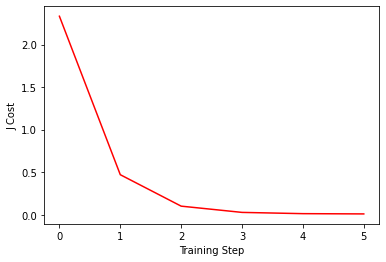

In [112]:
plt.plot(J_hist, color='red');
# naming the x axis
plt.xlabel('Training Step')
# naming the y axis
plt.ylabel('J Cost')
plt.show()